MQL5 MqlRates struct all data comes as a an array of that

In [1]:
import numpy as np
import os

dtype = np.dtype([
    ("time", np.int64),
    ("O", np.float64),
    ("H", np.float64),
    ("L", np.float64),
    ("C", np.float64),
    ("TV", np.int64),
    ("S", np.int32),
    ("RV", np.int64)
])

In [2]:
cd /home/andre/.wine/drive_c/Program Files/MetaTrader 5/MQL5/Files

/home/andre/.wine/drive_c/Program Files/MetaTrader 5/MQL5/Files


In [3]:
data = np.fromfile('PETR495data.bin', dtype=dtype)

In [4]:
import pandas as pd
import datetime

In [5]:
### first and last data just 64 mb of data entire PETR4

In [6]:
datetime.datetime.utcfromtimestamp(data[-1][0])

datetime.datetime(2018, 6, 13, 17, 59)

In [7]:
datetime.datetime.utcfromtimestamp(data[0][0])

datetime.datetime(2008, 5, 23, 10, 5)

In [8]:
df = pd.DataFrame(data)

In [9]:
df.time = df.time.apply(lambda x: datetime.datetime.utcfromtimestamp(x))

In [11]:
df.set_index('time').head()

,O,H,L,C,TV,S,RV
time,,,,,,,
2008-05-23 10:05:00,39.07,39.07,39.07,39.07,815,1,754300
2008-05-23 10:06:00,39.22,39.22,39.06,39.21,186,1,164800
2008-05-23 10:07:00,39.22,39.22,39.11,39.14,137,1,146000
2008-05-23 10:08:00,39.14,39.17,38.83,38.91,321,1,264500
2008-05-23 10:09:00,38.91,38.95,38.83,38.94,142,1,148700


In [5]:
cd /home/andre/PycharmProjects/gitstocks/stocks

/home/andre/PycharmProjects/gitstocks/stocks


In [42]:
from Tools import Meta5_Ibov_Load 

In [43]:
import importlib
importlib.reload(Meta5_Ibov_Load)

<module 'Tools.Meta5_Ibov_Load' from '/home/andre/PycharmProjects/gitstocks/stocks/Tools/Meta5_Ibov_Load.py'>

In [44]:
Meta5_Ibov_Load.Set_Data_Path('/home/andre/PycharmProjects/gitstocks/stocks/data', 
                              '/home/andre/.wine/drive_c/Program Files/MetaTrader 5/MQL5/Files')

master data loaded size (minutes) 507080
Symbols lodaded:
0    PETR4
1    BBDC4
2    BBAS3
3    ABEV3
4    ITUB4
5    VALE3
6     DOL$
dtype: object


In [46]:
##507080/(60*7*365)

In [47]:
#Meta5_Ibov_Load.Load_Meta5_Data()

In [48]:
df = Meta5_Ibov_Load.masterdf

In [49]:
Meta5_Ibov_Load.Report_Missing(df)

percentage of missing minute data  2.90%


In [50]:
df.tail(1)

,O,H,L,C,TV,RV,O,H,L,C,...,L,C,TV,RV,O,H,L,C,TV,RV
time,,,,,,,,,,,,,,,,,,,,,
2018-06-14 17:47:00,15.07,15.08,15.06,15.08,8,11700,25.38,25.38,25.35,25.35,...,51.64,51.64,2,1700,3810.0,3810.5,3809.5,3810.5,12,110


In [51]:
df.head(1)

,O,H,L,C,TV,RV,O,H,L,C,...,L,C,TV,RV,O,H,L,C,TV,RV
time,,,,,,,,,,,,,,,,,,,,,
2013-05-31 10:07:00,18.74,18.77,18.74,18.77,53,105300,17.17,17.17,17.16,17.16,...,26.08,26.1,33,8800,3261.267,3262.029,3260.506,3260.506,920,1155


In [52]:
from matplotlib import pyplot as plt

In [53]:
%matplotlib inline
df = Meta5_Ibov_Load.FixedColumnNames()

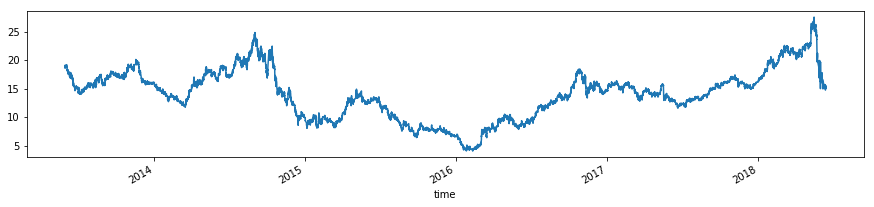

In [54]:
plt.figure(figsize=(15,3))
df.PETR4_C.plot()